In [12]:
import os 
import numpy as np
import pandas as pd
import cv2 as cv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


In [35]:
folder_dir = r"C:\Users\Prince\flowers"
# folders  = ["daisy","dandelion","rose","sunflower","tulip"]

In [36]:
data = []
label = []

In [38]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [39]:
data_array  = np.array(data)
label_array = np.array(label)

In [40]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_array)
y = to_categorical(y,5)
x = data_array/255

In [41]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.20,random_state = 10)

In [76]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = "relu"))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(256,(3,3),activation = "relu"))
# model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [77]:
datagen = ImageDataGenerator(
     rotation_range=20,
     zoom_range = 0.20,
     width_shift_range=0.3,
     height_shift_range=0.3,
     horizontal_flip=True,
     vertical_flip=True)


datagen.fit(x_train)

In [78]:
model.compile(optimizer = "adam",loss = "mean_squared_error",metrics = ["accuracy"])

In [79]:
batch_size=32
epochs=5
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

C:\Users\Prince\AppData\Local\Temp/ipykernel_4080/2324592689.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/5
108/108 [==============================] - 69s 627ms/step - loss: 0.1498 - accuracy: 0.3412 - val_loss: 0.1433 - val_accuracy: 0.4375
Epoch 2/5
108/108 [==============================] - 69s 641ms/step - loss: 0.1342 - accuracy: 0.4457 - val_loss: 0.1267 - val_accuracy: 0.5081
Epoch 3/5
108/108 [==============================] - 70s 647ms/step - loss: 0.1276 - accuracy: 0.4883 - val_loss: 0.1359 - val_accuracy: 0.4954
Epoch 4/5
108/108 [==============================] - 71s 659ms/step - loss: 0.1229 - accuracy: 0.5279 - val_loss: 0.1151 - val_accuracy: 0.5498
Epoch 5/5
108/108 [==============================] - 74s 681ms/step - loss: 0.1193 - accuracy: 0.5546 - val_loss: 0.1056 - val_accuracy: 0.5961


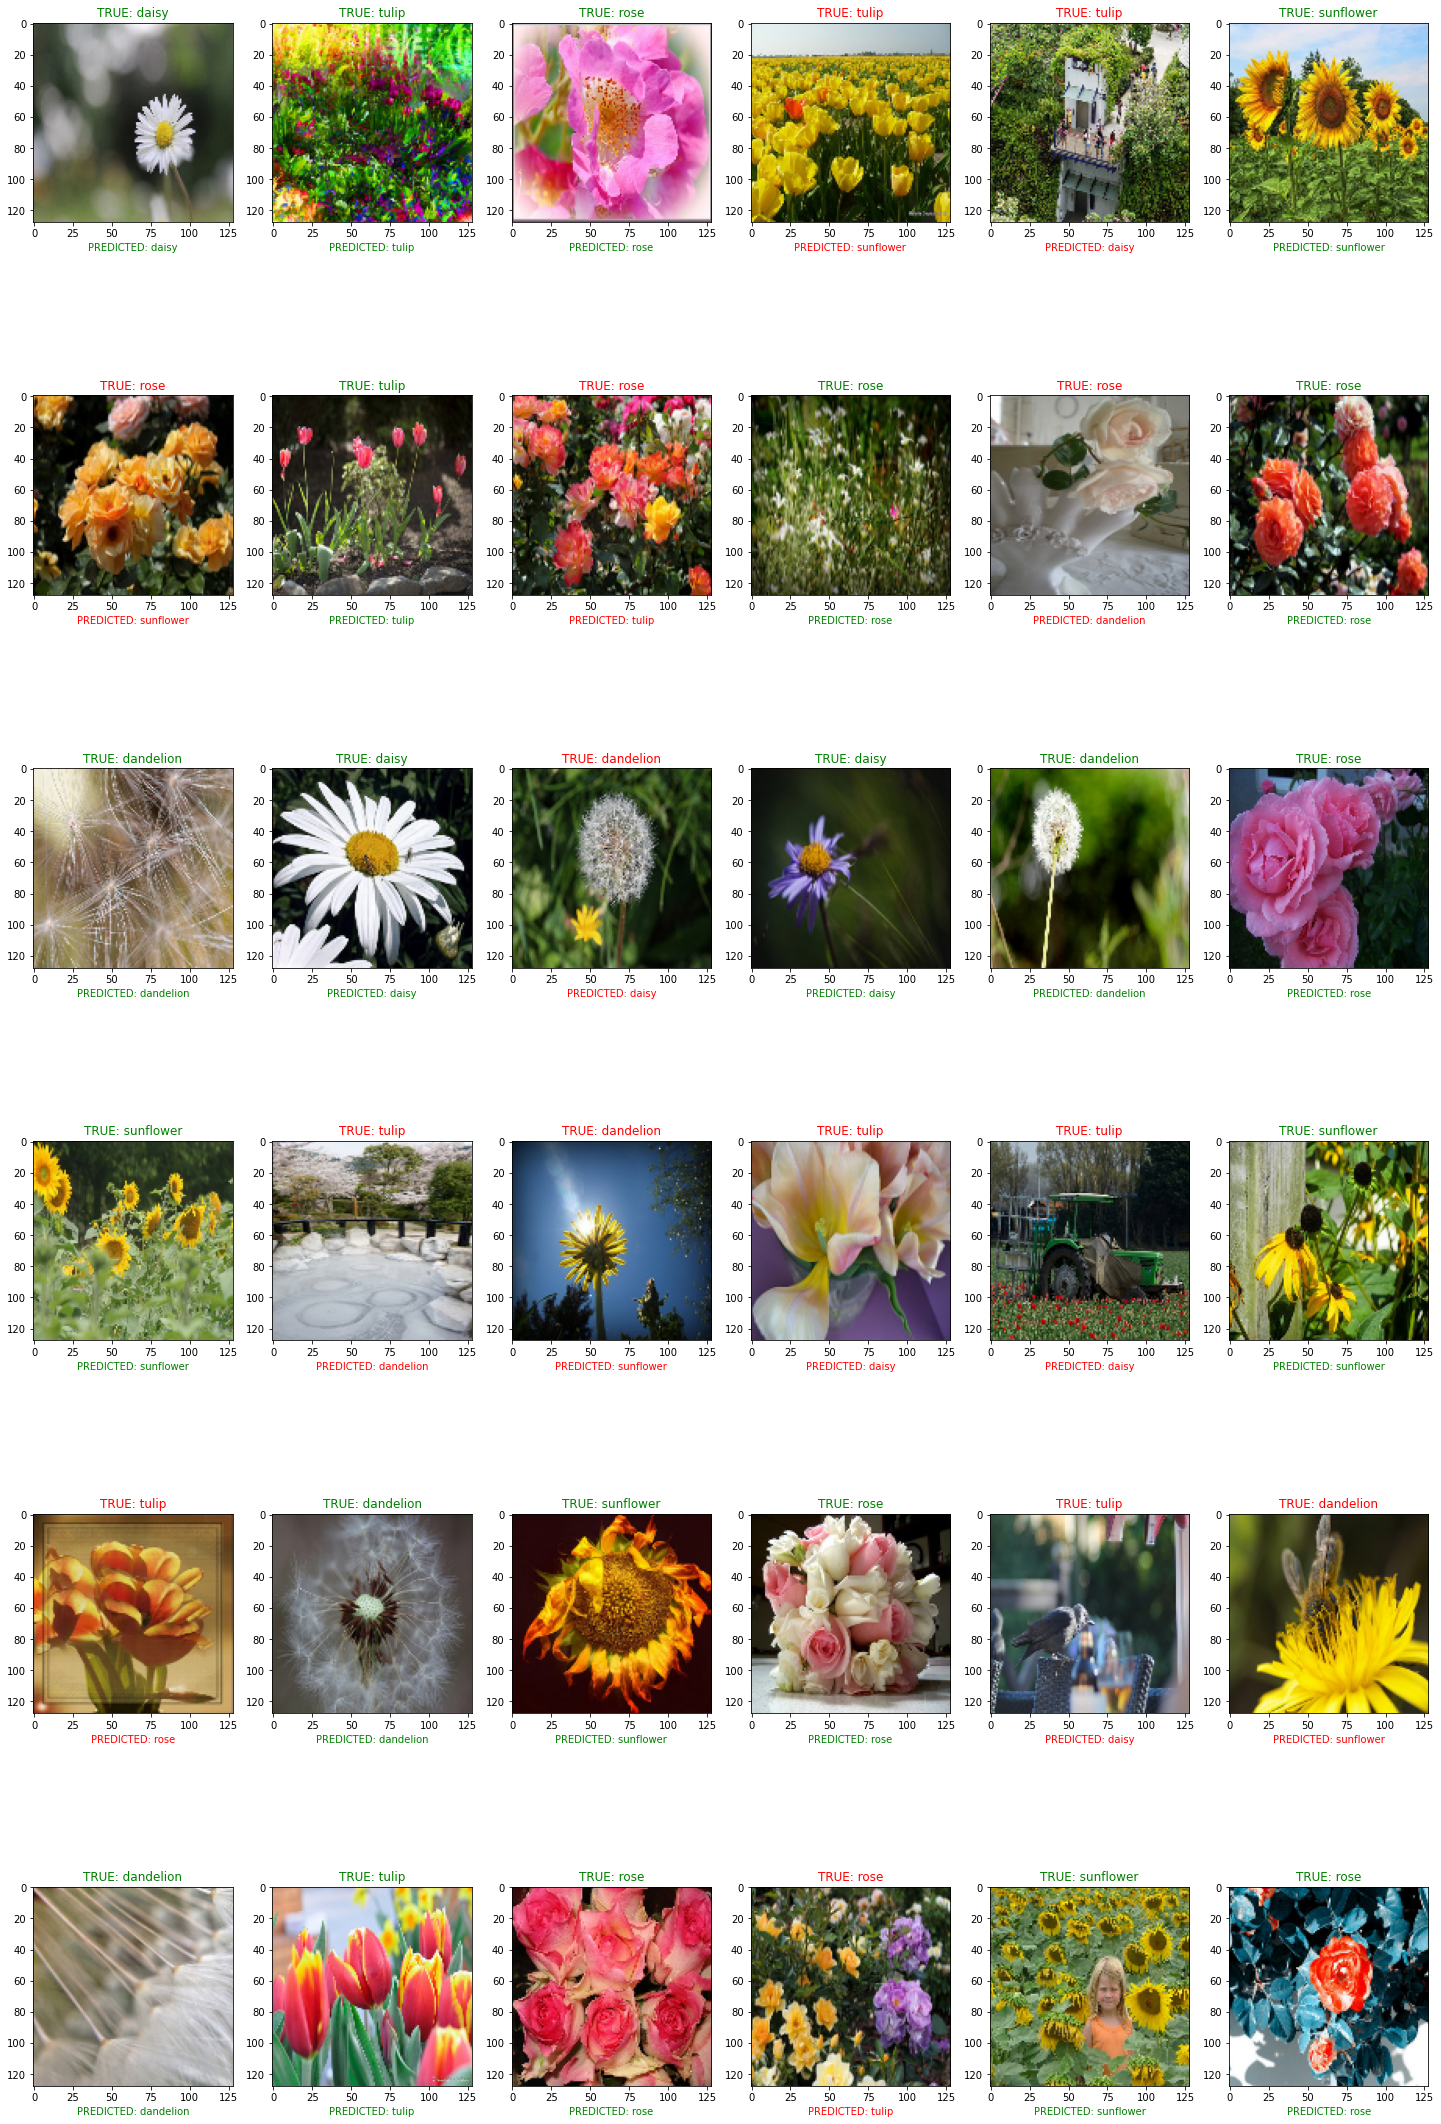

In [75]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')